In [30]:
import openml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tab_benchmark.datasets import get_dataset
from tab_benchmark.datasets import datasets_characteristics_path
from tab_benchmark.utils import set_seeds, evaluate_set
from tab_benchmark.models.xgboost import XGBRegressor
from tab_benchmark.models.lightgbm import LGBMRegressor
from tab_benchmark.models.catboost import CatBoostRegressor
from tab_benchmark.models.dnn_models import TabTransformerModel, TabNetModel, SaintModel

# Load a dataset

We use openml to load datasets and tasks. Alternatively, we can load a dataset by name for the openml datasets/tasks defined under tab_benchmark.datasets.datasets_characteristics_path

In [2]:
datasets = pd.read_csv(datasets_characteristics_path)
datasets

,task_id,dataset_id,dataset_name,task_type,task_name,target_name,evaluation_type,n_folds,n_instances,n_features,n_categorical_features,n_continuous_features,n_nans,n_rows_nans,n_classes,url
0,168868,41138,APSFailure,Supervised Classification,binary_classification,class,crossvalidation,10,76000.0,171.0,1.0,170.0,1078695.0,75244.0,2,https://www.openml.org/d/41138
1,34539,4135,Amazon_employee_access,Supervised Classification,binary_classification,target,crossvalidation,10,32769.0,10.0,10.0,0.0,0.0,0.0,2,https://www.openml.org/d/4135
2,146818,40981,Australian,Supervised Classification,binary_classification,A15,crossvalidation,10,690.0,15.0,9.0,6.0,0.0,0.0,2,https://www.openml.org/d/40981
3,146047,258,BNG(credit-a),Supervised Classification,binary_classification,class,crossvalidation,10,1000000.0,16.0,10.0,6.0,0.0,0.0,2,https://www.openml.org/d/258
4,9910,4134,Bioresponse,Supervised Classification,binary_classification,target,crossvalidation,10,3751.0,1777.0,1.0,1776.0,0.0,0.0,2,https://www.openml.org/d/4134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,361249,44971,white_wine,Supervised Regression,regression,quality,crossvalidation,10,4898.0,12.0,0.0,12.0,0.0,0.0,1,https://www.openml.org/d/44971
278,361076,44136,wine_quality,Supervised Regression,regression,quality,crossvalidation,10,6497.0,12.0,0.0,12.0,0.0,0.0,1,https://www.openml.org/d/44136
279,211860,42370,yacht_hydrodynamics,Supervised Regression,regression,Residuary.resistance,crossvalidation,10,308.0,7.0,0.0,7.0,0.0,0.0,1,https://www.openml.org/d/42370
280,361091,44027,year,Supervised Regression,regression,year,crossvalidation,10,515345.0,91.0,0.0,91.0,0.0,0.0,1,https://www.openml.org/d/44027


In [3]:
dataset_row = datasets.loc[datasets['dataset_name'] == 'california_housing']
dataset_row

,task_id,dataset_id,dataset_name,task_type,task_name,target_name,evaluation_type,n_folds,n_instances,n_features,n_categorical_features,n_continuous_features,n_nans,n_rows_nans,n_classes,url
216,361255,44977,california_housing,Supervised Regression,regression,medianHouseValue,crossvalidation,10,20640.0,9.0,0.0,9.0,0.0,0.0,1,https://www.openml.org/d/44977


## By dataset_id

In [4]:
dataset_id = 44977
dataset = openml.datasets.get_dataset(dataset_id)

/tmp/ipykernel_23410/2214438084.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(dataset_id)


In [5]:
dataset

OpenML Dataset
Name..........: california_housing
Version.......: 7
Format........: arff
Upload Date...: 2022-12-22 16:15:15
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/22111841/california_housing.arff
OpenML URL....: https://www.openml.org/d/44977
# of features.: 9
# of instances: 20640

In [6]:
X, y, cat_ind, att_names = dataset.get_data(target=dataset.default_target_attribute)
X, y, cat_ind, att_names

(       longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
 0        -122.23     37.88                41       880.0          129.0   
 1        -122.22     37.86                21      7099.0         1106.0   
 2        -122.24     37.85                52      1467.0          190.0   
 3        -122.25     37.85                52      1274.0          235.0   
 4        -122.25     37.85                52      1627.0          280.0   
 ...          ...       ...               ...         ...            ...   
 20635    -121.09     39.48                25      1665.0          374.0   
 20636    -121.21     39.49                18       697.0          150.0   
 20637    -121.22     39.43                17      2254.0          485.0   
 20638    -121.32     39.43                18      1860.0          409.0   
 20639    -121.24     39.37                16      2785.0          616.0   
 
        population  households  medianIncome  
 0           322.0       126.0        8

## By task_id

In [7]:
task_id = 361255
task = openml.tasks.get_task(task_id)
task

/home/bbelucci/miniconda3/envs/tab_benchmark/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/bbelucci/miniconda3/envs/tab_benchmark/lib/python3.12/site-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)


OpenML Regression Task
Task Type Description: https://www.openml.org/tt/TaskType.SUPERVISED_REGRESSION
Task ID..............: 361255
Task URL.............: https://www.openml.org/t/361255
Estimation Procedure.: crossvalidation
Target Feature.......: medianHouseValue

In [8]:
dataset = task.get_dataset()
X, y, cat_ind, att_names = dataset.get_data(target=task.target_name)

/home/bbelucci/miniconda3/envs/tab_benchmark/lib/python3.12/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)


In [9]:
# we also get the splits for the task (10 fold CV for datasets defined here)
task_fold, task_repeat, task_sample = 0, 0, 0
split = task.get_train_test_split_indices(task_fold, task_repeat, task_sample)

In [10]:
X.iloc[split.train]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
20149,-119.12,34.38,28,7200.0,1281.0,3793.0,1238.0,4.0750
20228,-119.29,34.28,38,2387.0,748.0,1537.0,741.0,2.3147
2469,-119.97,36.57,17,1497.0,308.0,1425.0,247.0,2.0313
6417,-117.99,34.15,44,2492.0,611.0,1951.0,596.0,3.1304
8175,-118.11,33.79,36,2223.0,370.0,1039.0,370.0,5.7942
...,...,...,...,...,...,...,...,...
16363,-121.31,38.00,35,2097.0,351.0,977.0,358.0,4.3958
4295,-118.29,34.09,29,2240.0,792.0,2254.0,739.0,2.3317
20165,-119.29,34.45,26,2849.0,535.0,1383.0,532.0,2.6893
5419,-118.43,34.02,38,2172.0,437.0,830.0,368.0,3.9091


## By name

In [11]:
dataset_name = 'california_housing'

In [14]:
dataset, task_name, target = get_dataset(dataset_name)

/home/bbelucci/code/tab_benchmark/tab_benchmark/datasets.py:25: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = datasets.get_dataset(int(dataset_id))


In [15]:
X, y, cat_ind, att_names = dataset.get_data(target=target)

# Load a model
We can load a model by instantiating the class of the model. For example, we can load the XGBoostModel by doing:

In [16]:
model = XGBRegressor()

In this example we have initialized the model with the default parameters of the library, but they are not always the recommended by library/papers. We recommend starting with the parameters defined under tab_benchmark.benchmark.benchmarked_models, which were chosen based on the library and papers to obtain a general good performance.

In [17]:
from tab_benchmark.benchmark.benchmarked_models import models_dict

In [18]:
for model_name, (model_cls, model_params) in models_dict.items():
    print(f'{model_name}: {model_cls}\nRecommended parameters:{model_params}\n')

LinearRegression: <class 'abc.LinearRegression'>
Recommended parameters:{}

LogisticRegressionCV: <class 'tab_benchmark.models.factories.LogisticRegressionCV'>
Recommended parameters:{}

RidgeCV: <class 'abc.RidgeCV'>
Recommended parameters:{}

RidgeClassifierCV: <class 'abc.RidgeClassifierCV'>
Recommended parameters:{}

LassoCV: <class 'abc.LassoCV'>
Recommended parameters:{}

MultiTaskLassoCV: <class 'abc.MultiTaskLassoCV'>
Recommended parameters:{}

ElasticNetCV: <class 'abc.ElasticNetCV'>
Recommended parameters:{}

MultiTaskElasticNetCV: <class 'abc.MultiTaskElasticNetCV'>
Recommended parameters:{}

DecisionTreeClassifier: <class 'abc.DecisionTreeClassifier'>
Recommended parameters:{}

DecisionTreeRegressor: <class 'abc.DecisionTreeRegressor'>
Recommended parameters:{}

ExtraTreeClassifier: <class 'abc.ExtraTreeClassifier'>
Recommended parameters:{}

ExtraTreeRegressor: <class 'abc.ExtraTreeRegressor'>
Recommended parameters:{}

ExtraTreesRegressor: <class 'abc.ExtraTreesRegressor'

In [19]:
model_cls, model_params = models_dict['XGBRegressor']
model = model_cls(**model_params)
model

XGBRegressor(colsample_bylevel=1.0, colsample_bynode=1.0, colsample_bytree=1.0,
             early_stopping_rounds=100, gamma=0.1,
             kwargs={'kwargs': {'kwargs': {}}}, learning_rate=0.3,
             max_delta_step=0.0, max_depth=6, min_child_weight=1.0,
             n_estimators=10000, reg_alpha=1e-10, reg_lambda=1.0, subsample=1.0,
             tree_method='auto')

# Preprocess a dataset

Before preprocessing we split the dataset in training and test. We can also use the CV splits provided by the task.

In [20]:
seed = 42  # reproducibility
set_seeds(seed)  # set seeds of python, numpy and pytorch altogheter
pct_test = 0.2  # pct of total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pct_test, random_state=seed)

Each model defines an appropriate preprocessing pipeline that can be created by calling the method `create_model_pipeline`. It takes as parameters, the task and the names of the categorical features, continuous features and all features ordered. The pipeline can be manually modified by changing the appropriate parameters on model instantiation, for example, by changing the categorical_encoder method. Every model defined in tab_benchmark is wrapped around a SkLearnExtension class that defines these parameters, consult its documentation for more information on the possible values.

In [22]:
categorical_features_names = [att_names[i] for i, value in enumerate(cat_ind) if value is True]
continuous_features_names = [att_names[i] for i, value in enumerate(cat_ind) if value is False]
orderly_features_names = att_names
model.create_preprocess_pipeline(task=task_name, categorical_features_names=categorical_features_names, 
                                 continuous_features_names=continuous_features_names, orderly_features_names=orderly_features_names)

Then, we can preprocess the features and targets with the appropriate pipelines that were created, defined as attributes

In [23]:
X_train_ = model.data_preprocess_pipeline_.fit_transform(X_train)
X_test_ = model.data_preprocess_pipeline_.transform(X_test)
y_train_ = model.target_preprocess_pipeline_.fit_transform(y_train.to_frame())
y_test_ = model.target_preprocess_pipeline_.transform(y_test.to_frame())

# Simple Model Fit (Default Parameters)

Each model have a fit method where we need to pass the training and target data, the categorical_features if they exist and the task. The task is only required for models that have some task dependent parameter, for example the parameter 'objective' for XGBClassifier, which will change for a binary_classification or a multiclass classification task.

In [24]:
model.fit(X=X_train_, y=y_train_, cat_features=categorical_features_names, task=task)

[0]	validation_0-rmse:0.83782
[1]	validation_0-rmse:0.72154
[2]	validation_0-rmse:0.64557
[3]	validation_0-rmse:0.59894
[4]	validation_0-rmse:0.56952
[5]	validation_0-rmse:0.54969
[6]	validation_0-rmse:0.53324
[7]	validation_0-rmse:0.51705
[8]	validation_0-rmse:0.50566
[9]	validation_0-rmse:0.49600
[10]	validation_0-rmse:0.48761
[11]	validation_0-rmse:0.47960
[12]	validation_0-rmse:0.47571
[13]	validation_0-rmse:0.47333
[14]	validation_0-rmse:0.47058
[15]	validation_0-rmse:0.46822
[16]	validation_0-rmse:0.46733
[17]	validation_0-rmse:0.46577
[18]	validation_0-rmse:0.46454
[19]	validation_0-rmse:0.46430
[20]	validation_0-rmse:0.46445
[21]	validation_0-rmse:0.46356
[22]	validation_0-rmse:0.46290
[23]	validation_0-rmse:0.46185
[24]	validation_0-rmse:0.46263
[25]	validation_0-rmse:0.46260
[26]	validation_0-rmse:0.46276
[27]	validation_0-rmse:0.46180
[28]	validation_0-rmse:0.46023
[29]	validation_0-rmse:0.45853
[30]	validation_0-rmse:0.45856
[31]	validation_0-rmse:0.45847
[32]	validation_0-

/home/bbelucci/miniconda3/envs/tab_benchmark/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [16:03:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397827678/work/src/learner.cc:742: 
Parameters: { "auto_early_stopping", "categorical_imputer", "categorical_target_encoder", "categorical_target_min_frequency", "categorical_target_type", "categorical_type", "continuous_imputer", "continuous_target_scaler", "continuous_target_type", "continuous_type", "early_stopping_validation_size", "handle_unknown_categories", "variance_threshold" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(colsample_bylevel=1.0, colsample_bynode=1.0, colsample_bytree=1.0,
             early_stopping_rounds=100, enable_categorical=True, gamma=0.1,
             kwargs={'kwargs': {'kwargs': {}}}, learning_rate=0.3,
             max_delta_step=0.0, max_depth=6, min_child_weight=1.0,
             n_estimators=10000, reg_alpha=1e-10, reg_lambda=1.0, subsample=1.0,
             tree_method='auto')

# Visualize the learning curve

Every model still have the same attributes and methods of the original implementation. We can for example visualize the results of XGBRegressor

In [25]:
model.evals_result_

{'validation_0': OrderedDict([('rmse',
               [0.8378239546975591,
                0.7215447775672041,
                0.6455746878633912,
                0.598938045411916,
                0.5695210473856933,
                0.5496878823873318,
                0.5332449613612035,
                0.5170488251407713,
                0.5056616450877907,
                0.49600003520394637,
                0.4876073536399303,
                0.47960209100675943,
                0.47570860441418256,
                0.4733322439547421,
                0.47058179498550745,
                0.46821768646506956,
                0.4673262771044972,
                0.4657712427248012,
                0.46453517483986706,
                0.46429902579026244,
                0.46444582791461275,
                0.4635566093940691,
                0.46290390072222726,
                0.4618486891710494,
                0.46262928334986503,
                0.46259918983848386,
               

In [26]:
model.evals_result_['validation_0']['rmse']

[0.8378239546975591,
 0.7215447775672041,
 0.6455746878633912,
 0.598938045411916,
 0.5695210473856933,
 0.5496878823873318,
 0.5332449613612035,
 0.5170488251407713,
 0.5056616450877907,
 0.49600003520394637,
 0.4876073536399303,
 0.47960209100675943,
 0.47570860441418256,
 0.4733322439547421,
 0.47058179498550745,
 0.46821768646506956,
 0.4673262771044972,
 0.4657712427248012,
 0.46453517483986706,
 0.46429902579026244,
 0.46444582791461275,
 0.4635566093940691,
 0.46290390072222726,
 0.4618486891710494,
 0.46262928334986503,
 0.46259918983848386,
 0.46275520082964944,
 0.4617952989649305,
 0.46023045380342004,
 0.4585344812830489,
 0.45855852337907804,
 0.4584664864572362,
 0.45869390241779534,
 0.4573912028814899,
 0.45840118799221335,
 0.4573225506814441,
 0.45600878646100684,
 0.4549826706617202,
 0.45435724963879953,
 0.45358069506110016,
 0.4536955493409514,
 0.45486660690455555,
 0.4547089164007861,
 0.45460225129114024,
 0.45442367047407206,
 0.45293377634572485,
 0.452741166

Text(0, 0.5, 'RMSE')

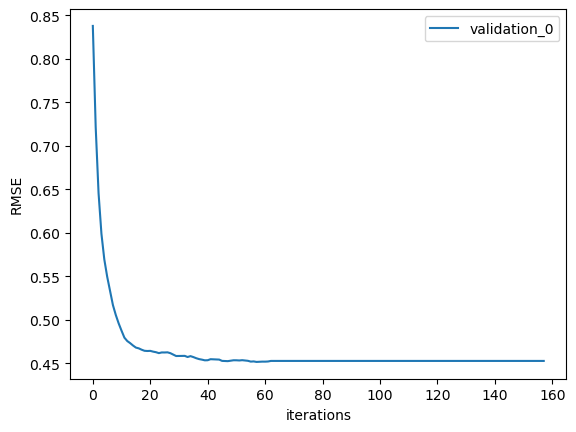

In [29]:
fig, ax = plt.subplots()
ax.plot(model.evals_result_['validation_0']['rmse'], label='validation_0')
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('RMSE')

Note that the model has automatically created a validation set to apply early stopping. This behavior is implemented by default for every model that supports early stopping, via the parameters `auto_early_stopping` and `early_stopping_validation_size`

# Model Evaluation
We can evaluate a set with the function evaluate_set.

In [32]:
evaluate_set(model, (X_test_, y_test_), metrics=['rmse', 'r2_score'])

[0.42507026, 0.8156793713569641]

We can also do predictions as we would do with the original model

In [33]:
model.predict(X_test_.iloc[0:10])

array([-1.370361  , -1.0444422 ,  2.7920852 ,  0.6571719 ,  0.66614217,
       -0.30496818,  0.23632185, -0.5045903 ,  0.8172879 ,  2.093583  ],
      dtype=float32)